<a href="https://colab.research.google.com/github/vzeizer/COVID19_MedicalImage/blob/master/Covid_XRays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Medical Image Classification Using Transfer Learning

## Project Overview
This project demonstrates the application of advanced deep learning techniques to tackle a critical healthcare challenge: the automated classification of medical images for COVID-19 diagnosis. Using transfer learning approaches with state-of-the-art convolutional neural network architectures (ResNet, VGG16, and VGG19), this solution addresses the real-world constraints of limited data availability and class imbalance in medical imaging datasets.

## Technical Highlights
- **Transfer Learning Implementation**: Leveraged pre-trained models (ResNet, VGG16, VGG19) on ImageNet dataset, adapting them for medical image classification through strategic fine-tuning of specific layers
- **Imbalanced Dataset Handling**: Developed solutions for a significantly skewed dataset (about 1:8 ratio of normal to COVID-19 cases) using sampling and weighting techniques
- **Deep Learning Framework**: Utilized TensorFlow for model implementation, demonstrating proficiency in industry-standard deep learning tools
- **Medical Image Processing**: Applied specialized preprocessing techniques suitable for medical imaging data

## Challenge and Approach
The primary challenge in this project was developing a reliable classification model with a small, imbalanced dataset - a common scenario in medical imaging projects. Instead of training from scratch, which would require vast amounts of data, I implemented a transfer learning strategy that capitalizes on pre-trained models' feature extraction capabilities while fine-tuning specific layers for our medical imaging context.

## Skills Demonstrated
- Deep Learning Architecture Design
- Transfer Learning Implementation
- Medical Image Processing
- Handling Imbalanced Datasets
- TensorFlow/Keras Framework Proficiency
- Model Performance Optimization
- Healthcare AI Applications

## Impact and Applications
This project showcases the practical application of computer vision techniques in healthcare, demonstrating how deep learning can be effectively deployed even with limited data resources. The approach developed here can be extended to other medical imaging classification tasks where data scarcity and class imbalance are common challenges.

In [ ]:
# installing imutils
!pip install imutils

"imutils" is a library in Python designed to make basic image processing functions such as **translation, rotation, resizing, skeletonization, displaying Matplotlib images, sorting contours, detecting edges**, and much more, easier with OpenCV. It is essentially a set of convenience functions to simplify common tasks in computer vision and image processing projects.

Here are some of the functionalities provided by imutils:

In [ ]:
# installing and upgrading gdown to download files from Google Drive
!pip install --upgrade gdown

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.applications import resnet
# because we are going to deal with a CNN architecture
from tensorflow.keras.layers import Activation, Dropout,Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
# dropout to prevent overfitting
from tensorflow.keras.layers import Dropout
# in the last Layers of the NN, use Flatten
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
# Input ->
from tensorflow.keras.layers import Input
# Sequential for layers concatenation, and Model for...
from tensorflow.keras.models import Model, Sequential
# ReduceLROnPlateau -> Quando o modelo estiver próximo de um Plateau, reduzir a Learning Rate.
# LearningRateScheduler ->
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
# Usar, por exemplo, o otimizador Adam
from tensorflow.keras.optimizers import Adam
# to_categorical -> (é uma exigência do tensorflow para algumas coisas)
import tensorflow as tf
from tensorflow.keras.metrics import AUC, Recall, Precision
from tensorflow.keras.utils import to_categorical
# LabelBinarizer ->
from sklearn.preprocessing import LabelBinarizer
# train_test_split para separar as imagens em treino e teste
from sklearn.model_selection import train_test_split
# dois imports com relação às métricas de classificação
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# imutils para tarefas comuns em visão computacional e processamento de imagens
from imutils import paths
# matplotlib para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# pandas e numpy para cálculos numéricos
import pandas as pd
import numpy as np
# random para aleatoriedade
import random
# shutil ->
import shutil
# import for opencv
import cv2
# os to deal with operation system stuffs
import os
# gdown for downloading Google Drive stored Files
from gdown import download


The **shutil** library in Python is used for **file operations and high-level file handling tasks**. It provides functions for copying, moving, renaming, and deleting files and directories. Some common use cases of the shutil library include:

**Copying Files and Directories**: The **shutil.copy()** function is used to copy files, while **shutil.copytree()** is used to copy directories recursively.

**Moving and Renaming Files**: The **shutil.move()** function is used to **move files or directories** to a new location, and it can also be used to rename files.

**Deleting Files and Directories**: The **shutil.rmtree()** function is used to **delete** a directory and all its contents **recursively**.

**Working with Archives**: The shutil library provides functions for working with archive files like **ZIP files**. For example, **shutil.make_archive()** can be used to create a **ZIP archive from a directory**, and shutil.**unpack_archive()** can be used to extract files from a ZIP archive.

**File Permissions and Ownership**: The shutil module provides functions for **copying file permissions and ownership information** along with the files themselves.

Overall, the shutil library simplifies many common file operations in Python and provides a convenient way to work with files and directories.

The **`os`** library in Python provides a portable way to interact with the operating system. It offers functions for performing various operating system-related tasks, such as file and directory operations, process management, and environment variables manipulation. Some of the key functionalities provided by the `os` module include:

1. **File and Directory Operations**: The `os` module provides functions for creating, deleting, renaming, and listing files and directories. For example, **`os.mkdir()`** is used to create directories, **`os.remove()`** to delete files, and **`os.listdir()`** to list the contents of a directory.

2. **Path Manipulation**: The `os.path` submodule contains functions for manipulating file paths in a platform-independent manner. Functions like **`os.path.join()`** are used to concatenate path components, and `os.path.exists()` to check if a path exists.

3. **Process Management**: The `os` module provides functions for interacting with processes, such as `os.system()` for executing shell commands, `os.spawn*()` for spawning new processes, and **`os.kill()`** for sending signals to processes.

4. **Environment Variables**: The **`os.environ`** dictionary provides access to the environment variables of the current process. You can use **`os.environ.get()`** to retrieve the value of a specific environment variable.

5. **Platform Information**: The `os` module provides functions for **retrieving information about the underlying platform**, such as `os.name` to get the name of the operating system, and **`os.uname()`** (or `os.posix_uname()` on Unix-like systems) to get detailed system information.

Overall, the `os` module is essential for performing system-level operations in a platform-independent manner and is widely used in Python programs for tasks related to file management, process handling, and environment interaction.

In [ ]:
# the file_id and the composed URL
file_id = '1Ur423RYiHyDFIK4zEKVJcAPHeW5nadnz'  # Replace with the actual file ID
url = f'https://drive.google.com/uc?export=download&id={file_id}'
# downloading the file through the URL and naming it as file.zip
download(url, 'file.zip')  # Replace 'filename.ext' with your desired name

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1Ur423RYiHyDFIK4zEKVJcAPHeW5nadnz
From (redirected): https://drive.google.com/uc?export=download&id=1Ur423RYiHyDFIK4zEKVJcAPHeW5nadnz&confirm=t&uuid=fba7dc12-6272-46d6-a227-9e4e80a6989e
To: /content/file.zip
100%|██████████| 253M/253M [00:03<00:00, 70.3MB/s]


'file.zip'

In [ ]:
# unzipping the file
!unzip /content/file.zip -d /content/

Archive:  /content/file.zip
  inflating: /content/annotations/imageannotation_ai_lung_bounding_boxes.json  
  inflating: /content/images/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: /content/images/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: /content/images/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: /content/images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: /content/images/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: /content/images/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: /content/images/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: /content/images/1-s2.0-S0929664620300449-gr3_lrg-a.jpg  
  inflating: /content/images/1-s2.0-S0929664620300449-gr3_lrg-b.jpg  
  inflating: /content/images/1-s2.0-S0929664620300449-gr3_lrg-c.jpg  
  inflating: /content/images/1-s2.0-S0929664620300449-gr3_lrg-d.jpg  
  inflating: /content/images/1-s2.0-S0929664620300449-gr3_lrg-e.jpg  
  inflating: /content/images/1-s2.0-S16841182203

In [ ]:
%%bash
# creating folders for COVID and Normal Outcomes
mkdir -p dataset/covid
mkdir -p dataset/normal

In [ ]:
# the path needed to store images and related contents
covid_dataset_path = '../content/'

In [ ]:
# construct the path to the metadata CSV file and load it
csvPath = os.path.sep.join([covid_dataset_path, "metadata.csv"])
df = pd.read_csv(csvPath)

In [ ]:
# visualizing the first 10 lines
df.head(10)

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
5,4,5.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 30, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1b.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive diffuse interstitial opacities and...,NaN,NaN
6,5,NaN,NaN,NaN,ARDS,NaN,Y,Y,NaN,NaN,...,2017,NaN,images,ARDSSevere.png,NaN,https://en.wikipedia.org/wiki/File:ARDSSevere.png,CC BY-SA,Severe ARDS. Person is intubated with an OG in...,NaN,NaN
7,6,0.0,NaN,NaN,COVID-19,NaN,Y,Y,Y,NaN,...,"January 6, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2a.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN
8,6,4.0,NaN,NaN,COVID-19,NaN,Y,Y,Y,NaN,...,"January 10, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2b.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN
9,3,4.0,M,74.0,SARS,N,NaN,NaN,NaN,NaN,...,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 74-year-old man who developed sympto...,NaN,NaN


In [ ]:
# obtaining the name of the features
print(list(df.columns))

['patientid', 'offset', 'sex', 'age', 'finding', 'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu', 'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation', 'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view', 'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url', 'license', 'clinical_notes', 'other_notes', 'Unnamed: 28']


In [ ]:
# getting the shape of the DataFrame
df.shape

(372, 29)

In [ ]:
# the number of Unique Patient IDs
df['patientid'].nunique()

204

In [ ]:
# the total number of 'license' values, including NaN values
df['license'].value_counts(dropna=False)

,count
license,
NaN,166
CC BY-NC-SA,149
CC BY-NC-SA 4.0,23
CC BY-NC-ND,14
Apache 2.0,10
listed as authorized for everyone,7
CC BY,2
CC BY-SA,1


In [ ]:
# the total number of 'other_notes, including NaN values
df['other_notes'].value_counts(dropna=False)

,count
other_notes,
NaN,138
Credit to UOC Radiology ASST Bergamo Est Director Dr Gianluigi Patelli,10
"Credit to Omir Antunes Paiva, Dr. Rodrigo Caruso Chate, Wenzhou Medical University, and coronacases.org",10
Credit to College of Radiologists Singapore and Tan Tock Seng,8
"Credit to Izzo Andrea, D'Aversa Lucia, Ceremonial Giuseppe, Mazzella Giuseppe, Pergoli Pericle, Faiola Eugenio Leone, Di Pastena Francesca",7
...,...
"Case courtesy of Dr Vikas Shah, Radiopaedia.org, rID: 35764",1
"Case courtesy of Dr Henry Knipe, Radiopaedia.org, rID: 45780",1
"Case courtesy of Dr Sigmund Stuppner, Radiopaedia.org, rID: 46812",1


In [ ]:
# the total number of 'sex' values, including NaN values
df['sex'].value_counts(dropna=False)

,count
sex,
M,211
F,118
NaN,43


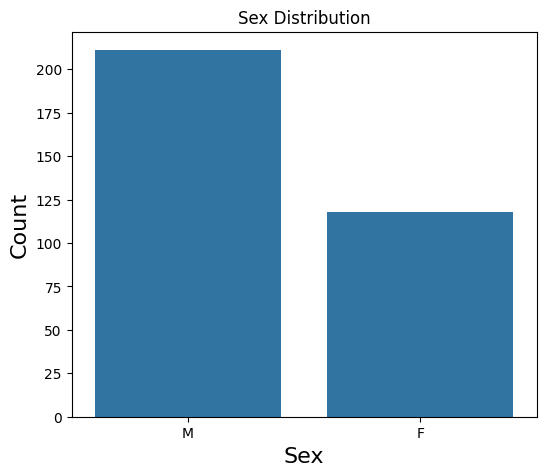

In [ ]:
plt.figure(figsize=(6,5))

plt.title('Sex Distribution')

sns.countplot(x=df['sex'],)

plt.xlabel('Sex',size=16)
plt.ylabel('Count',size=16)

plt.show()

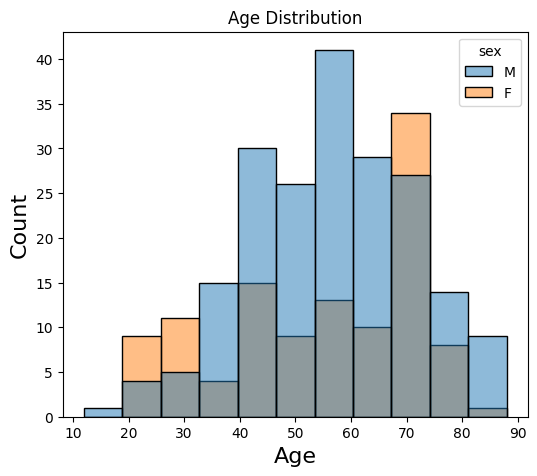

In [ ]:
# the total number of 'age' values, including NaN values
plt.figure(figsize=(6,5))

plt.title('Age Distribution')

sns.histplot(data=df,x='age',hue='sex')

plt.xlabel('Age',size=16)
plt.ylabel('Count',size=16)

plt.show()

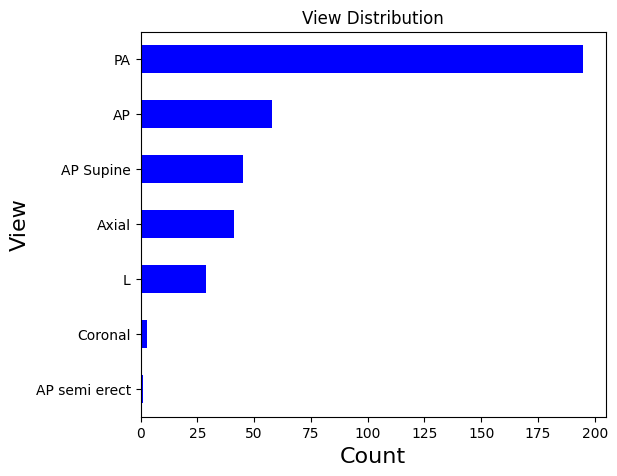

In [ ]:
# the total number of 'view' values, including NaN values
plt.figure(figsize=(6,5))

plt.title('View Distribution')

df['view'].value_counts(dropna=False).sort_values().plot(kind='barh',color='blue')

plt.ylabel('View',size=16)
plt.xlabel('Count',size=16)

plt.show()



In [ ]:
# the total number of 'intubated' values, including NaN values
df['intubated'].value_counts(dropna=False)

,count
intubated,
NaN,300
Y,62
N,10


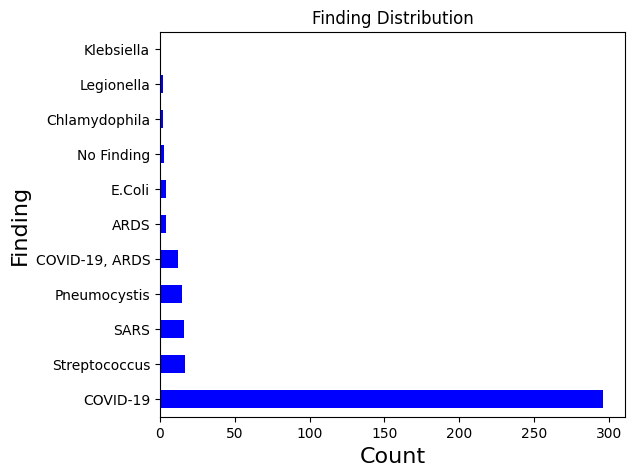

In [ ]:
# the total number of 'finding' values, including NaN values
plt.figure(figsize=(6,5))

plt.title('Finding Distribution')

df['finding'].value_counts(dropna=False).plot(kind='barh',color='blue')

plt.xlabel('Count',size=16)
plt.ylabel('Finding',size=16)

plt.show()

In [ ]:
# the total number of 'filename' values, including NaN values
df['filename'].value_counts(dropna=False)

,count
filename,
auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,1
radiopaedia_org_covid-19-pneumonia-36_86526_0-dcm.nii.gz,1
covid-19-pneumonia-53.jpg,1
4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg,1
covid-19-caso-70-2-APS.jpg,1
...,...
kjr-21-e24-g001-l-b.jpg,1
kjr-21-e24-g001-l-a.jpg,1
ciaa199.pdf-001-c.png,1


In [ ]:
# we need to replace conveniently the COVID-19 entries for the majority class
df['finding'].replace('COVID-19, ARDS','COVID-19').apply(lambda x: 0 if x=='COVID-19' else 1).value_counts(dropna=False)

,count
finding,
0,308
1,64


In [ ]:
# doing the class simplification in terms of COVID and Non-COVID diagnoses
df['finding'] = df['finding'].replace('COVID-19, ARDS','COVID-19').apply(lambda x: 0 if x=='COVID-19' else 1)

In [ ]:
# verifying the number of 'finding' unique values to confirme self-consistence
df['finding'].value_counts(dropna=False)

,count
finding,
0,308
1,64


In [ ]:
# the path to the dataset
dataset_path='../content/dataset'

In [ ]:
# loop over the rows of the COVID-19 data frame
for (i, row) in df.iterrows():
    # if (1) the current case is not COVID-19 or (2) this is not
    # a 'PA' view, then ignore the row
    if row["finding"] != 0 or row['view']!='PA':
        continue

    # build the path to the input image file
    # joining the paths: dataset_path+images+filname
    imagePath = os.path.sep.join([covid_dataset_path, "images", row["filename"]])

    # if the input image file does not exist (there are some errors in
    # the COVID-19 metadeta file), ignore the row
    if not os.path.exists(imagePath):
        continue

    # extract the filename from the image path and then construct the
    # path to the copied image file
    # "os.path.sep" is a string that represents the separator used
    # in file paths for the current operating system.
    filename = row["filename"].split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/covid", filename])

    # copy the image
    shutil.copy2(imagePath, outputPath)

In [ ]:
# loop over the rows of the COVID-19 data frame
for (i, row) in df.iterrows():
    # if (1) the current case is not COVID-19 or (2) this is not
    if row["finding"] != 1 or row['view']=='PA':
        continue

    # build the path to the input image file
    imagePath = os.path.sep.join([covid_dataset_path, "images", row["filename"]])

    # if the input image file does not exist (there are some errors in
    # the COVID-19 metadeta file), ignore the row
    if not os.path.exists(imagePath):
        continue

    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = row["filename"].split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/normal", filename])

    # copy the image
    shutil.copy2(imagePath, outputPath)

### Now, let us plot some images in a row-wise schema.

In [ ]:
def ceildiv(a, b):
    return -(-a // b)

def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

In [ ]:
# list of full paths to normal images
normal_images = list(paths.list_images(f"{dataset_path}/normal"))
# list of full paths to covid images
covid_images = list(paths.list_images(f"{dataset_path}/covid"))

In [ ]:
# let us check the covid images paths
print(len(covid_images))
print(len(normal_images))

25
21


In [ ]:
covid_images = random.sample(covid_images,25)

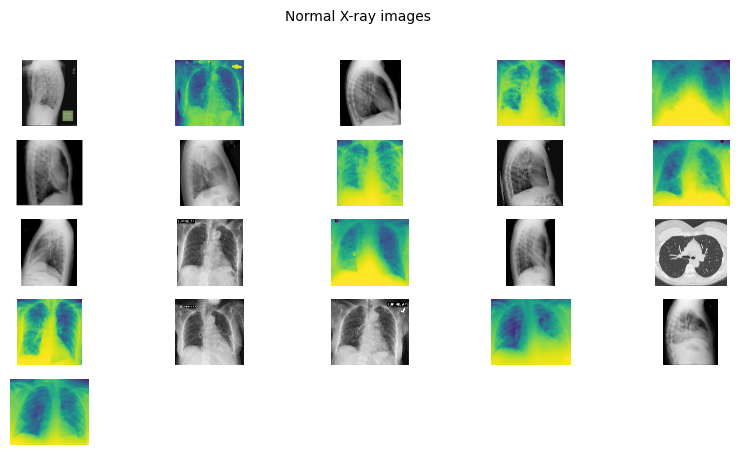

In [ ]:
# plotting the Normal X-ray Images
plots_from_files(normal_images, rows=5, maintitle="Normal X-ray images")

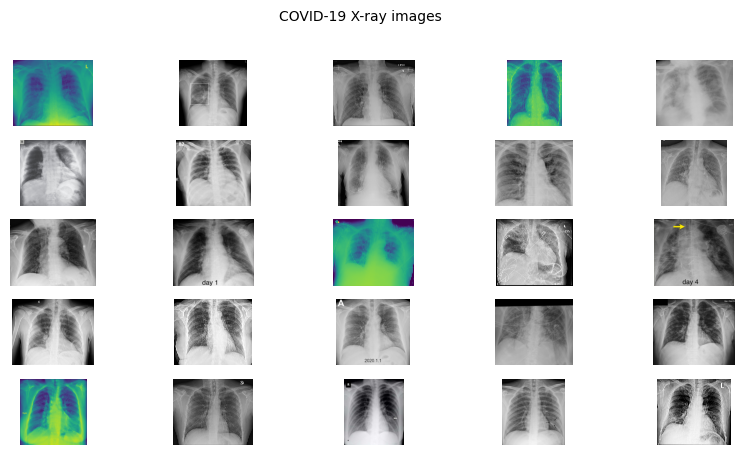

In [ ]:
# plotting the COVID-19 X-ray Images
plots_from_files(covid_images, rows=5, maintitle="COVID-19 X-ray images")

In [ ]:
# setting some training parameters

# initial learning rate
INIT_LR = 1e-2
# number of epochs to train
EPOCHS = 10
# batch size
BS = 4

In [ ]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset_path))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    # actually, from the folder name
    label = imagePath.split(os.path.sep)[-2]
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    # the resizing procedure is important for the model training
    image = cv2.imread(imagePath)
    # convert to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # resizes the image, so they have same size
    image = cv2.resize(image, (224, 224))
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

[INFO] loading images...


In [ ]:
# let us verify the labels
print(pd.Series(labels).value_counts(dropna=False))

covid     152
normal     21
Name: count, dtype: int64


<Axes: >

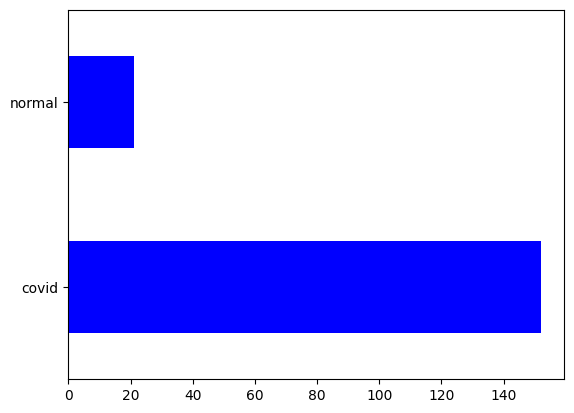

In [ ]:
pd.Series(labels).value_counts(dropna=False).plot(kind='barh',color='blue')

In [ ]:
labels = pd.Series(labels)#.replace('covid',0).replace('normal',1)

In [ ]:
index_covid = labels[labels == "covid"].sample(5*21,random_state=42).index
index_noncovid = labels[labels == "normal"].index

In [ ]:
val_covid = labels.loc[index_covid]
val_noncovid = labels.loc[index_noncovid]

In [ ]:
data_covid = data[index_covid]
data_noncovid = data[index_noncovid]

In [ ]:
labels = pd.concat([val_covid,val_noncovid])
data = np.concatenate([data_covid,data_noncovid])

In [ ]:
# let us verify the data, which is composed of many image pixels
data

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.04705882, 0.04705882, 0.04705882],
         [0.07843137, 0.07843137, 0.07843137]

In [ ]:
# putting the labels into categorical variables for training
labels = to_categorical(pd.Series(list(labels)).replace('covid',0).replace('normal',1))
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
# the labels are also being stratified through training and testing sets
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.4, stratify=labels, random_state=42)
# initialize the training data augmentation object
trainAug = ImageDataGenerator(rotation_range=35,horizontal_flip=True,
                              fill_mode="nearest")

<ipython-input-328-aa718cbd7c4b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels = to_categorical(pd.Series(list(labels)).replace('covid',0).replace('normal',1))


In [ ]:
# loading VGG16 or VGG19 network, ensuring the head FC layer sets are left off
# importing the base model
#baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
baseModel = VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

"""
baseModel = resnet.ResNet101(
    include_top=True,
    weights='imagenet',
    input_tensor=Input(shape=(224, 224, 3)),
    pooling=None,
    classes=1000)
"""
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
print(headModel)
headModel = AveragePooling2D(pool_size=(3, 3))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
# i.e., freezing the base model layers
for layer in baseModel.layers:
    layer.trainable = False

<KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_322>


In [ ]:
# compile our model
print("[INFO] compiling model...")
# Instead of legacy syntax:
# optimizer = tf.keras.optimizers.legacy.Adam()

# Use new Keras 3 syntax:
from keras import optimizers
opt = optimizers.Adam(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=[AUC()])

# training the head of the network
print("[INFO] training head...")
H = model.fit(
    trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=2*EPOCHS,class_weight={0:1,1:5})

[INFO] compiling model...
[INFO] training head...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - auc_21: 0.6594 - loss: 2.1264

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 288ms/step - auc_21: 0.6559 - loss: 2.1828 - val_auc_21: 0.8053 - val_loss: 0.5626
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - auc_21: 0.5625 - loss: 2.4163 - val_auc_21: 0.5859 - val_loss: 0.8207
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - auc_21: 0.5505 - loss: 1.6199 - val_auc_21: 0.6878 - val_loss: 0.7010
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - auc_21: 0.8125 - loss: 0.4195 - val_auc_21: 0.3645 - val_loss: 1.1837
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - auc_21: 0.5670 - loss: 1.7928 - val_auc_21: 0.2780 - val_loss: 2.4051
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - auc_21: 0.2500 - loss: 1.9703 - val_auc_21: 0.2757 - val_loss: 1.7375
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - auc_21: 0.6448 - loss: 1.3959 - val_auc_21: 0.2803 - val_loss: 1.3175
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - auc_21: 0.0000e+00 - loss: 1.9505 - val_auc_21: 0.2791 - val_loss: 1.4096
Epoch 9/20
18/18 ━━━━━

### Traninig and Validation performances

- Next, we are going to evaluate the performance of the DL model in the Training and Testing/Validation sets. AUC values for each epoch will be plotted, as well as validation losses.

In [ ]:
# printing the history object
H.history

{'auc_21': [0.6262646317481995,
  0.5625,
  0.7465780377388,
  0.8125,
  0.5213251113891602,
  0.25,
  0.7508431077003479,
  0.0,
  0.6024598479270935,
  0.875,
  0.7377504110336304,
  0.9375,
  0.7650268077850342,
  0.9375,
  0.7747470736503601,
  0.3125,
  0.7528268694877625,
  0.8125,
  0.6578060388565063,
  0.75],
 'loss': [2.662034034729004,
  2.416339635848999,
  1.688271164894104,
  0.4195473790168762,
  2.479308605194092,
  1.9702662229537964,
  1.4883004426956177,
  1.9504932165145874,
  1.1091724634170532,
  0.5175459980964661,
  0.9338948130607605,
  1.5428180694580078,
  0.9099947214126587,
  0.3938554525375366,
  1.2139685153961182,
  0.7527622580528259,
  0.9077984690666199,
  1.6491750478744507,
  0.8947420120239258,
  0.5128074288368225],
 'val_auc_21': [0.8052672147750854,
  0.5859284996986389,
  0.6878123879432678,
  0.36447519063949585,
  0.27797001600265503,
  0.27566322684288025,
  0.2802768349647522,
  0.2791233956813812,
  0.9200307130813599,
  0.9186851382255554

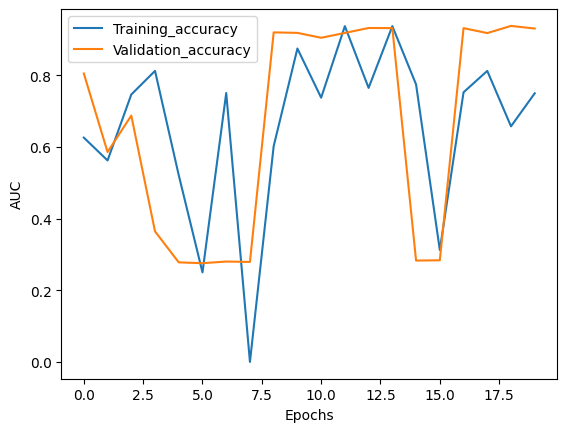

In [ ]:
# plotting AUC values for Training and Validation
aucs = H.history['auc_21']
val_aucs = H.history['val_auc_21']

plt.plot(range(len(aucs)),aucs, label = 'Training_accuracy')
plt.plot(range(len(val_aucs)),val_aucs, label = 'Validation_accuracy')

plt.ylabel('AUC')
plt.xlabel('Epochs')

plt.legend()

plt.show()

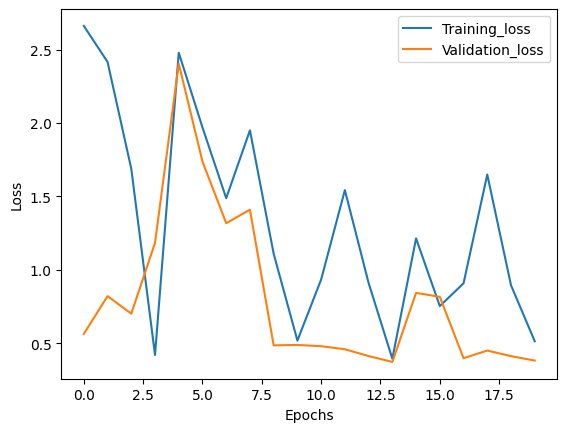

In [ ]:
# plotting loss values for Training and Validation
loss = H.history['loss']
val_loss = H.history['val_loss']

plt.plot(range(len(aucs)),loss, label = 'Training_loss')
plt.plot(range(len(val_aucs)),val_loss, label = 'Validation_loss')

plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend()

plt.show()

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs))

[INFO] evaluating network...
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        42
           1       1.00      0.33      0.50         9

    accuracy                           0.88        51
   macro avg       0.94      0.67      0.72        51
weighted avg       0.90      0.88      0.86        51



In [ ]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[42  0]
 [ 6  3]]
acc: 0.8824
sensitivity: 1.0000
specificity: 0.3333
